In [58]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

In [59]:
# data = pd.read_csv('co2.csv', parse_dates=['date'], index_col='date').astype(float)

In [60]:
data = pd.read_excel('人次统计.xlsx')

In [61]:
data['年月'] = data['年月'].astype('str')

In [62]:
data['年月'] =data['年月'].apply(lambda s:datetime.strptime(s, '%Y%m'))
data=data.set_index('年月')

In [63]:
data = data.resample('MS').mean()
data = data.fillna(method='bfill')

In [64]:
p = d = q = range(0, 2)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [65]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:931.8826704650818
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:546.3529129060196
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:568.1550860123684
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:294.3313066877922
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:884.0572887679087
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:522.546288774488
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:619.8940806460009
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:298.59926820654744
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:806.0575729343497
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:528.339733712434
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:550.443401700447
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:270.8219127005589
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:775.772974680424
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:504.12302630141534
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:546.3790701131609
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:273.71322920293585
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:830.600551154852
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:545.6948573964788
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:546.457559628

In [68]:
model = sm.tsa.statespace.SARIMAX(data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8204      2.899      0.283      0.777      -4.861       6.502
ar.S.L12      -1.4967      1.099     -1.362      0.173      -3.650       0.656
sigma2      1.271e+09   1.01e-08   1.26e+17      0.000    1.27e+09    1.27e+09


In [84]:
data

,人次
年月,
2016-01-01,128274
2016-02-01,97506
2016-03-01,161292
2016-04-01,152124
2016-05-01,160571
2016-06-01,148731
2016-07-01,155927
2016-08-01,152011
2016-09-01,140041


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

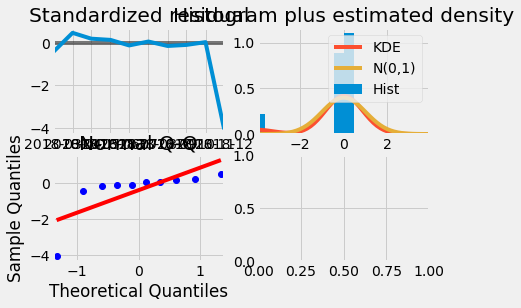

In [70]:
results.plot_diagnostics()
plt.show()

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), end=pd.to_datetime('2019-02-01'),dynamic=False)
pred_ci = pred.conf_int()

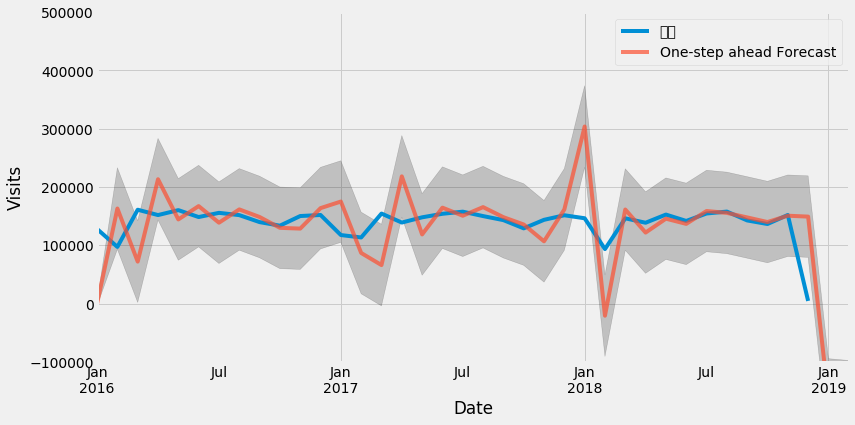

In [94]:
ax = data['1990':].plot(label='Observed',figsize=(12, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
 
ax.set_xlabel('Date')
ax.set_ylabel('Visits')
ax.set_ylim(-100000, 500000)
plt.legend()
 
plt.show()

In [ ]:
data_forecasted = pred.predicted_mean
data_truth = data['1998-01-01':]
 
# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)
 
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


In [ ]:
ax = data.plot(label='Observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
 
plt.legend()
plt.show()